In [1]:
!git clone https://github.com/YutongLei2020/CS-172B-Project.git
%cd CS-172B-Project/

Cloning into 'CS-172B-Project'...
remote: Enumerating objects: 34084, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 34084 (delta 11), reused 3 (delta 1), pack-reused 34058
Receiving objects: 100% (34084/34084), 58.12 MiB | 16.48 MiB/s, done.
Resolving deltas: 100% (13/13), done.
Updating files: 100% (35897/35897), done.
/content/CS-172B-Project


In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
import keras
import tensorflow as tf
from tensorflow.keras.models import load_model

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input, Flatten, Conv2D, MaxPool2D
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.regularizers import l2

from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D



In [3]:
import load_images_colab as load_images

In [4]:
X_train, Y_train, X_validation, Y_validation, X_test, Y_test = load_images.getDataset()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

169/169 [==============================] - 25s 90ms/step - loss: 1.8561 - accuracy: 0.2822 - val_loss: 1.8717 - val_accuracy: 0.2966
Epoch 2/30
168/169 [============================>.] - ETA: 0s - loss: 1.5401 - accuracy: 0.4082

169/169 [==============================] - 15s 88ms/step - loss: 1.5400 - accuracy: 0.4082 - val_loss: 1.7826 - val_accuracy: 0.3036
Epoch 3/30
168/169 [============================>.] - ETA: 0s - loss: 1.3548 - accuracy: 0.4796

169/169 [==============================] - 15s 91ms/step - loss: 1.3545 - accuracy: 0.4798 - val_loss: 1.7604 - val_accuracy: 0.3996
Epoch 4/30
168/169 [============================>.] - ETA: 0s - loss: 1.2444 - accuracy: 0.5231

169/169 [==============================] - 14s 85ms/step - loss: 1.2448 - accuracy: 0.5231 - val_loss: 1.4584 - val_accuracy: 0.4807
Epoch 5/30
168/169 [============================>.] - ETA: 0s - loss: 1.1712 - accuracy: 0.5539

169/169 [==============================] - 14s 86ms/step - loss: 1.1714 - accuracy: 0.5538 - val_loss: 1.3428 - val_accuracy: 0.4974
Epoch 6/30
168/169 [============================>.] - ETA: 0s - loss: 1.1111 - accuracy: 0.5798

169/169 [==============================] - 14s 84ms/step - loss: 1.1107 - accuracy: 0.5799 - val_loss: 1.2783 - val_accuracy: 0.5126
Epoch 7/30
168/169 [============================>.] - ETA: 0s - loss: 1.0600 - accuracy: 0.5930

169/169 [==============================] - 15s 88ms/step - loss: 1.0603 - accuracy: 0.5929 - val_loss: 1.2505 - val_accuracy: 0.5360
Epoch 8/30
168/169 [============================>.] - ETA: 0s - loss: 1.0167 - accuracy: 0.6145

169/169 [==============================] - 15s 90ms/step - loss: 1.0168 - accuracy: 0.6145 - val_loss: 1.1863 - val_accuracy: 0.5605
Epoch 9/30
169/169 [==============================] - 11s 64ms/step - loss: 0.9601 - accuracy: 0.6356 - val_loss: 1.4794 - val_accuracy: 0.4609
Epoch 10/30
169/169 [==============================] - 11s 64ms/step - loss: 0.9317 - accuracy: 0.6460 - val_loss: 1.2742 - val_accuracy: 0.5214
Epoch 11/30
169/169 [==============================] - 11s 63ms/step - loss: 0.8812 - accuracy: 0.6664 - val_loss: 1.2941 - val_accuracy: 0.5155
Epoch 12/30
169/169 [==============================] - 11s 63ms/step - loss: 0.8341 - accuracy: 0.6874 - val_loss: 1.2596 - val_accuracy: 0.5455
Epoch 13/30
169/169 [==============================] - 11s 63ms/step - loss: 0.7831 - accuracy: 0.7068 - val_loss: 1.3957 - val_accuracy: 0.4973
Epoch 14/30
169/169 [==============================] - 11s 66ms/step - loss: 0.7370 - accuracy: 0.7211 - val_loss: 1.2298 - val_accuracy: 0.566

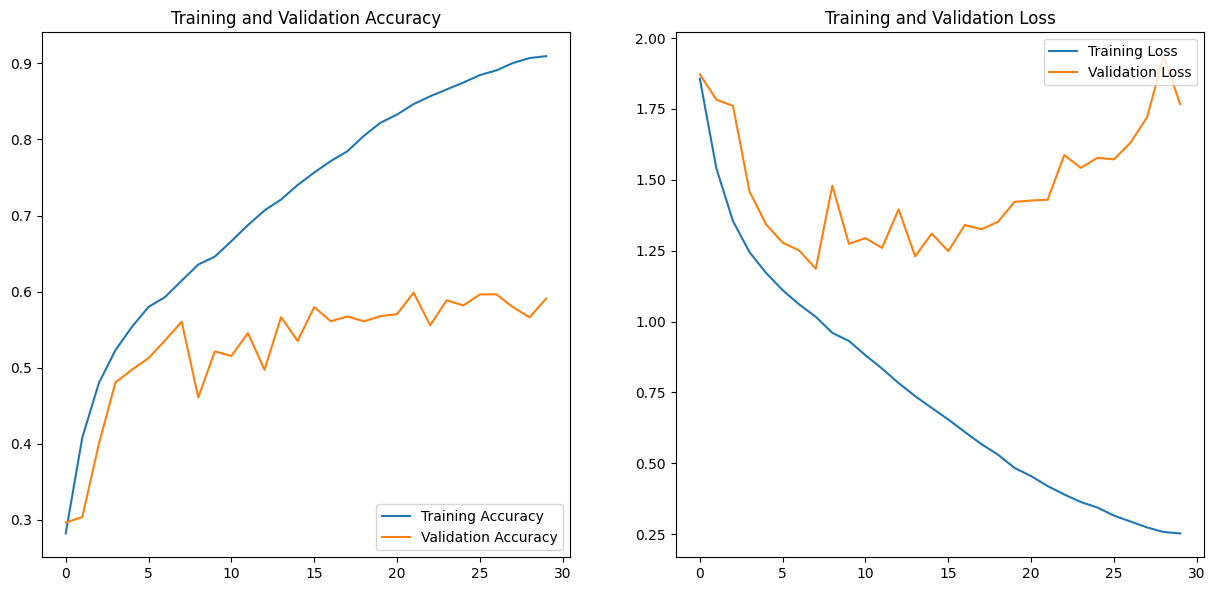

In [5]:
no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))

model.summary()



model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
    optimizer= Adam(learning_rate=0.001), 
    metrics=['accuracy']
)
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = 'models/CNN_model', 
        save_freq = 'epoch' ,
        save_best_only = True
    )
]

epoch_num = 30

history = model.fit(X_train, Y_train,batch_size=128,epochs=epoch_num, validation_data=(X_validation, Y_validation),callbacks = callbacks)


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epoch_num)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [6]:
print(max(val_acc))

0.5985788106918335


In [7]:
!pip install git+https://github.com/paulgavrikov/visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/paulgavrikov/visualkeras to /tmp/pip-req-build-2clp0eyw
  Running command git clone --filter=blob:none --quiet https://github.com/paulgavrikov/visualkeras /tmp/pip-req-build-2clp0eyw
  Resolved https://github.com/paulgavrikov/visualkeras to commit cd169b81be347e2090353ad6fe2bd2e1f4020cf4
  Preparing metadata (setup.py) ... done


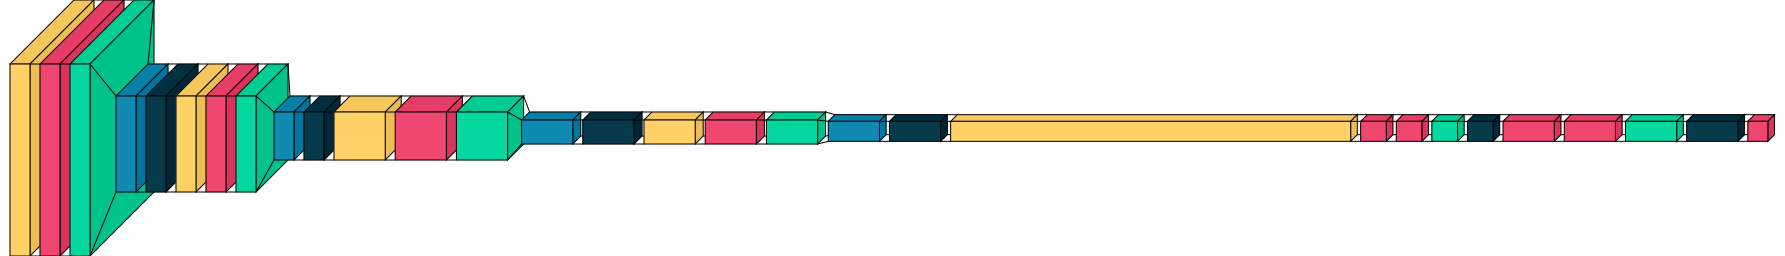

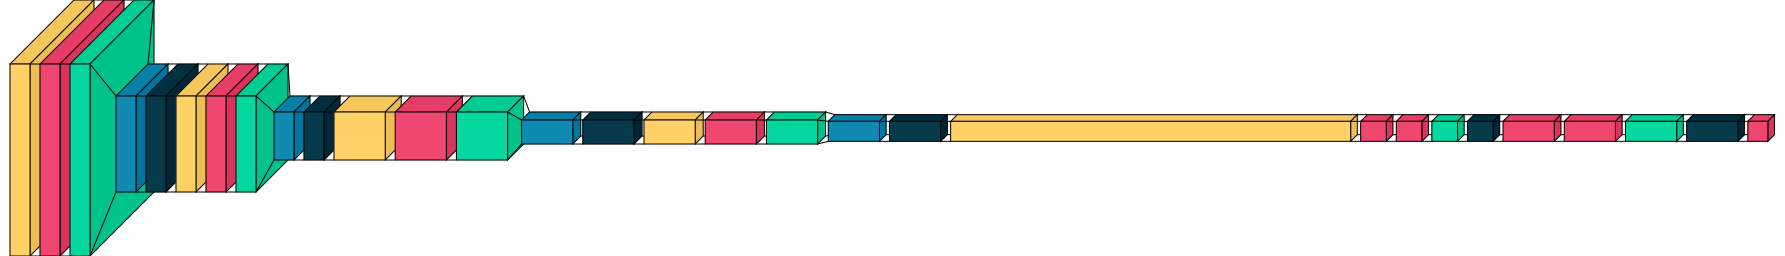

In [8]:
import visualkeras

model = model

visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show